<a href="https://colab.research.google.com/github/usercspa/dphil/blob/main/20250509_Dtah_growth_replot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install rpy2 to enable R magic commands
!pip install -q rpy2

# Install required R packages
# The IRkernel is pre-installed in Colab, but we install ggplot2 just in case


In [18]:
# Load the R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Growth_final.csv to Growth_final.csv


In [16]:
%%R

# Install and load required packages
if (!require("ggplot2")) install.packages("ggplot2", repos='http://cran.us.r-project.org')
library(ggplot2)

# Read the uploaded CSV file
data <- read.csv("Growth_final.csv")

data

   week mean_smed mean_dtah  sd_smed    sd_dtah
1     1 10.000000  10.00000 0.000000  0.0000000
2     2 10.000000  10.00000 0.000000  0.0000000
3     3 10.000000  10.00000 0.000000  0.0000000
4     4 10.000000  10.00000 0.000000  0.0000000
5     5 10.000000  10.00000 0.000000  0.0000000
6     6 10.000000  10.33333 0.000000  0.5773503
7     7  9.333333  12.00000 1.154701  1.0000000
8     8  9.000000  13.33333 1.000000  1.5275252
9     9  7.333333  14.66667 1.527525  3.0550505
10   10  6.000000  16.33333 1.000000  3.2145503
11   11  4.666667  19.66667 2.081666  3.0550505
12   12  4.666667  21.00000 2.081666  3.4641016
13   13  3.333333  26.66667 2.516611  3.7859389
14   14  3.000000  41.00000 2.645751  9.5393920
15   15  3.000000  45.66667 2.645751 13.3166562
16   16  3.000000  69.66667 2.645751 15.8850034
17   17  3.000000  89.00000 2.645751 22.7156334
18   18  3.000000 129.00000 2.645751 23.8117618
19   19  3.000000 155.66667 2.645751 33.2014056
20   20  3.000000 206.00000 2.645751 26.

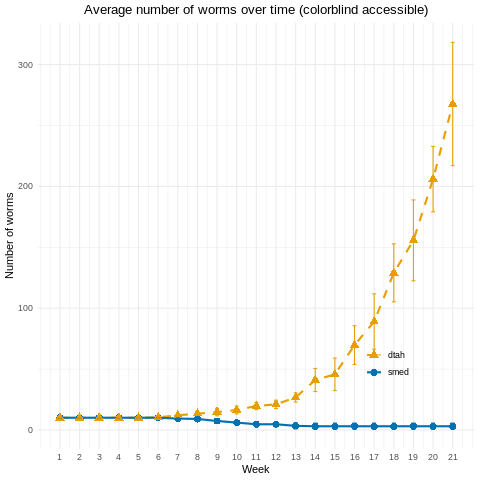

In [20]:
%%R

# Install and load ggplot2
if (!require("ggplot2")) install.packages("ggplot2", repos='http://cran.us.r-project.org')
library(ggplot2)

# Read the uploaded CSV file
data <- read.csv("Growth_final.csv")

# Remove weeks 22 and 23
data <- subset(data, !(week %in% c(22, 23)))

# Prepare data in long format for easier plotting
data_long <- data.frame(
  week = rep(data$week, 2),
  mean = c(data$mean_smed, data$mean_dtah),
  sd = c(data$sd_smed, data$sd_dtah),
  group = factor(rep(c("smed", "dtah"), each = nrow(data)))
)

# Colorblind-friendly palette (Okabe & Ito)
color_palette <- c("smed" = "#0072B2", "dtah" = "#E69F00")
shape_palette <- c("smed" = 16, "dtah" = 17) # Circle, triangle
linetype_palette <- c("smed" = "solid", "dtah" = "dashed")

# Plot with sans-serif font (Arial-like)
p <- ggplot(data_long, aes(x = week, y = mean, group = group)) +
  geom_line(aes(color = group, linetype = group), size = 1) +
  geom_point(aes(shape = group, color = group), size = 3) +
  geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd, color = group), width = 0.2) +
  scale_color_manual(values = color_palette) +
  scale_shape_manual(values = shape_palette) +
  scale_linetype_manual(values = linetype_palette) +
  labs(x = "Week", y = "Number of worms", color = "Species", shape = "Species", linetype = "Species") +
  scale_x_continuous(breaks = data$week) +
  ggtitle("Average number of worms over time") +
  theme_minimal() +
  theme(
    text = element_text(family = "sans"),
    legend.title = element_blank(),
    plot.title = element_text(hjust = 0.5),
    legend.position = c(0.8, 0.2)
  )

print(p)
ggsave("growth_accessible_sans.png", plot = p, width = 8, height = 6)
